## Diego de Miranda da Silva - 12311BCC060
[Repositório no GitHub](https://github.com/diegodemiranda/LIPAI)

# S6.A2. Análise Exploratória Pandas
## Carregar Dados


In [1]:
import pandas as pd

df_results = pd.read_csv('/content/classification_results_trial_0001.csv')

print("Primeiras 5 linhas do DataFrame:")
print(df_results.head())

print("\nInformações do DataFrame:")
df_results.info()

Primeiras 5 linhas do DataFrame:
      image_path real_class predicted_class  prob_benign  prob_malign
0  image_001.jpg     malign          malign     0.031429     0.968571
1  image_002.jpg     benign          benign     0.636410     0.363590
2  image_003.jpg     malign          malign     0.314356     0.685644
3  image_004.jpg     benign          benign     0.508571     0.491429
4  image_005.jpg     benign          benign     0.907566     0.092434

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_path       100 non-null    object 
 1   real_class       100 non-null    object 
 2   predicted_class  100 non-null    object 
 3   prob_benign      100 non-null    float64
 4   prob_malign      100 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


## Analisar Distribuição de Classes Reais


In [2]:
print("Distribuição das classes reais:")
print(df_results['real_class'].value_counts())

Distribuição das classes reais:
real_class
malign    55
benign    45
Name: count, dtype: int64


## Identificar Predições Incorretas



In [3]:
df_results['is_incorrect_prediction'] = df_results['real_class'] != df_results['predicted_class']

incorrect_predictions_df = df_results[df_results['is_incorrect_prediction']]

num_incorrect_predictions = len(incorrect_predictions_df)
print(f"Número total de predições incorretas: {num_incorrect_predictions}")

print("\nPrimeiras 5 linhas das predições incorretas:")
print(incorrect_predictions_df.head())

Número total de predições incorretas: 12

Primeiras 5 linhas das predições incorretas:
       image_path real_class predicted_class  prob_benign  prob_malign  \
20  image_021.jpg     malign          benign     0.807440     0.192560   
26  image_027.jpg     malign          benign     0.818015     0.181985   
27  image_028.jpg     malign          benign     0.860731     0.139269   
41  image_042.jpg     benign          malign     0.251782     0.748218   
46  image_047.jpg     malign          benign     0.609564     0.390436   

    is_incorrect_prediction  
20                     True  
26                     True  
27                     True  
41                     True  
46                     True  


## Analisar Confiança em Erros



In [4]:
false_positives_df = incorrect_predictions_df[
    (incorrect_predictions_df['real_class'] == 'benign') &
    (incorrect_predictions_df['predicted_class'] == 'malign')
]

false_negatives_df = incorrect_predictions_df[
    (incorrect_predictions_df['real_class'] == 'malign') &
    (incorrect_predictions_df['predicted_class'] == 'benign')
]

print("\nEstatísticas de confiança para Falsos Positivos (Real: benign, Predito: malign) - Probabilidade de Maligno:")
print(false_positives_df['prob_malign'].describe())

print("\nEstatísticas de confiança para Falsos Negativos (Real: malign, Predito: benign) - Probabilidade de Benigno:")
print(false_negatives_df['prob_benign'].describe())


print("\nAnálise da Confiança em Erros:\n")
if not false_positives_df.empty:
    print(f"Falsos Positivos ({len(false_positives_df)} casos): O modelo previu malignant para casos benignos com uma probabilidade média de maligno de {false_positives_df['prob_malign'].mean():.3f}. O valor mínimo foi {false_positives_df['prob_malign'].min():.3f} e o máximo foi {false_positives_df['prob_malign'].max():.3f}. Isso indica que, para alguns Falsos Positivos, o modelo teve alta confiança na previsão incorreta de maligno.")
else:
    print("Não foram encontrados Falsos Positivos.")

if not false_negatives_df.empty:
    print(f"Falsos Negativos ({len(false_negatives_df)} casos): O modelo previu benign para casos malignos com uma probabilidade média de benigno de {false_negatives_df['prob_benign'].mean():.3f}. O valor mínimo foi {false_negatives_df['prob_benign'].min():.3f} e o máximo foi {false_negatives_df['prob_benign'].max():.3f}. Similarmente, para alguns Falsos Negativos, o modelo estava altamente confiante em sua previsão incorreta de benigno.")
else:
    print("Não foram encontrados Falsos Negativos.")


Estatísticas de confiança para Falsos Positivos (Real: benign, Predito: malign) - Probabilidade de Maligno:
count    3.000000
mean     0.740211
std      0.077584
min      0.658934
25%      0.703576
50%      0.748218
75%      0.780850
max      0.813481
Name: prob_malign, dtype: float64

Estatísticas de confiança para Falsos Negativos (Real: malign, Predito: benign) - Probabilidade de Benigno:
count    9.000000
mean     0.754185
std      0.113331
min      0.590893
25%      0.677564
50%      0.807440
75%      0.835302
max      0.897216
Name: prob_benign, dtype: float64

Análise da Confiança em Erros:

Falsos Positivos (3 casos): O modelo previu malignant para casos benignos com uma probabilidade média de maligno de 0.740. O valor mínimo foi 0.659 e o máximo foi 0.813. Isso indica que, para alguns Falsos Positivos, o modelo teve alta confiança na previsão incorreta de maligno.
Falsos Negativos (9 casos): O modelo previu benign para casos malignos com uma probabilidade média de benigno de 

## Calcular Componentes da Matriz de Confusão



In [5]:
tp = len(df_results[(df_results['real_class'] == 'malign') & (df_results['predicted_class'] == 'malign')])
tn = len(df_results[(df_results['real_class'] == 'benign') & (df_results['predicted_class'] == 'benign')])
fp = len(false_positives_df)
fn = len(false_negatives_df)

print(f"Verdadeiros Positivos (TP): {tp}")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Verdadeiros Positivos (TP): 46
Verdadeiros Negativos (TN): 42
Falsos Positivos (FP): 3
Falsos Negativos (FN): 9


## Calcular Métricas de Performance


In [6]:
total_predictions = tp + tn + fp + fn
accuracy = (tp + tn) / total_predictions if total_predictions > 0 else 0

precision = tp / (tp + fp) if (tp + fp) > 0 else 0

recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Also known as Sensitivity

specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\n--- M\u00e9tricas de Performance ---")
print(f"Acur\u00e1cia: {accuracy:.4f}")
print(f"Precis\u00e3o: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")


--- Métricas de Performance ---
Acurácia: 0.8800
Precisão: 0.9388
Recall (Sensibilidade): 0.8364
Especificidade: 0.9333


## Identificar Casos Desafiadores (Benignos e Malignos)


In [7]:
print("\n--- Top 5 Casos Benignos Mais Desafiadores (preditos como Malignos com menor probabilidade de maligno) ---")
if not false_positives_df.empty:
    challenging_benign_as_malign = false_positives_df.sort_values(by='prob_malign', ascending=True).head(5)
    print(challenging_benign_as_malign[['image_path', 'real_class', 'predicted_class', 'prob_benign', 'prob_malign']])
else:
    print("Nenhum Falso Positivo encontrado.")

print("\n--- Top 5 Casos Malignos Mais Desafiadores (preditos como Benignos com menor probabilidade de benigno) ---")
if not false_negatives_df.empty:
    challenging_malign_as_benign = false_negatives_df.sort_values(by='prob_benign', ascending=True).head(5)
    print(challenging_malign_as_benign[['image_path', 'real_class', 'predicted_class', 'prob_benign', 'prob_malign']])
else:
    print("Nenhum Falso Negativo encontrado.")


--- Top 5 Casos Benignos Mais Desafiadores (preditos como Malignos com menor probabilidade de maligno) ---
       image_path real_class predicted_class  prob_benign  prob_malign
80  image_081.jpg     benign          malign     0.341066     0.658934
41  image_042.jpg     benign          malign     0.251782     0.748218
67  image_068.jpg     benign          malign     0.186519     0.813481

--- Top 5 Casos Malignos Mais Desafiadores (preditos como Benignos com menor probabilidade de benigno) ---
       image_path real_class predicted_class  prob_benign  prob_malign
69  image_070.jpg     malign          benign     0.590893     0.409107
46  image_047.jpg     malign          benign     0.609564     0.390436
70  image_071.jpg     malign          benign     0.677564     0.322436
76  image_077.jpg     malign          benign     0.690938     0.309062
20  image_021.jpg     malign          benign     0.807440     0.192560


## Identificar Casos Benignos Desafiadores


In [8]:
benign_cases = df_results[df_results['real_class'] == 'benign']

challenging_benign_cases = benign_cases.sort_values(by='prob_benign', ascending=True).head(5)

print("\n--- Top 5 Casos Benignos Mais Desafiadores (com menor probabilidade de benigno) ---")
print(challenging_benign_cases[['image_path', 'real_class', 'predicted_class', 'prob_benign', 'prob_malign']])


--- Top 5 Casos Benignos Mais Desafiadores (com menor probabilidade de benigno) ---
       image_path real_class predicted_class  prob_benign  prob_malign
67  image_068.jpg     benign          malign     0.186519     0.813481
41  image_042.jpg     benign          malign     0.251782     0.748218
80  image_081.jpg     benign          malign     0.341066     0.658934
47  image_048.jpg     benign          benign     0.502679     0.497321
3   image_004.jpg     benign          benign     0.508571     0.491429


## Identificar Casos Malignos Desafiadores



In [9]:
malign_cases = df_results[df_results['real_class'] == 'malign']

challenging_malign_cases = malign_cases.sort_values(by='prob_benign', ascending=False).head(5)

print("\n--- Top 5 Casos Malignos Mais Desafiadores (com maior probabilidade de benigno) ---")
print(challenging_malign_cases[['image_path', 'real_class', 'predicted_class', 'prob_benign', 'prob_malign']])


--- Top 5 Casos Malignos Mais Desafiadores (com maior probabilidade de benigno) ---
       image_path real_class predicted_class  prob_benign  prob_malign
91  image_092.jpg     malign          benign     0.897216     0.102784
27  image_028.jpg     malign          benign     0.860731     0.139269
65  image_066.jpg     malign          benign     0.835302     0.164698
26  image_027.jpg     malign          benign     0.818015     0.181985
20  image_021.jpg     malign          benign     0.807440     0.192560


## Visualizar Resultados



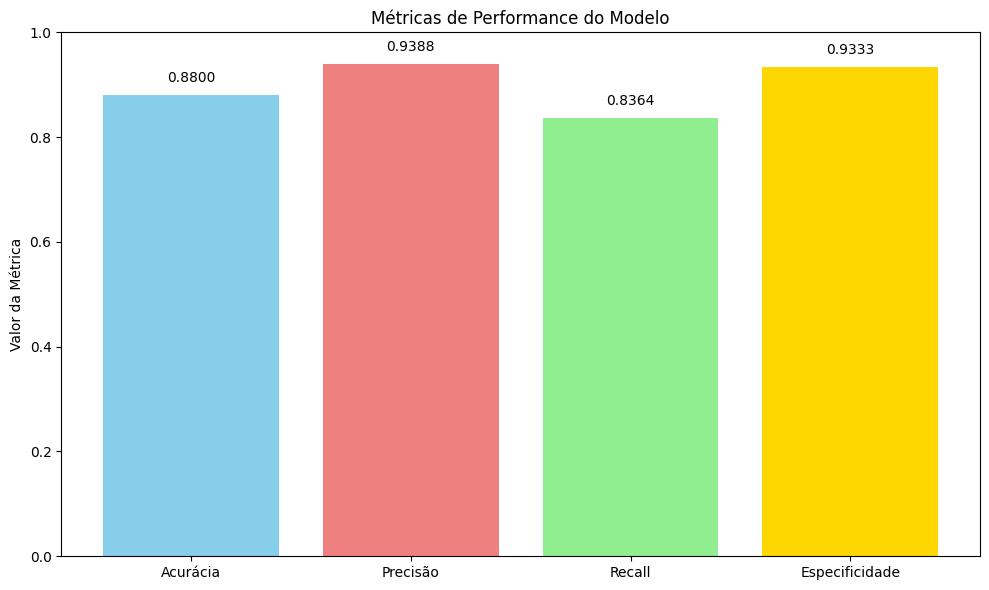

In [10]:
import matplotlib.pyplot as plt

metrics_names = ['Acurácia', 'Precisão', 'Recall', 'Especificidade']
metrics_values = [accuracy, precision, recall, specificity]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Métricas de Performance do Modelo')
plt.ylabel('Valor da Métrica')
plt.ylim(0, 1) # Metrics are usually between 0 and 1

for i, value in enumerate(metrics_values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Resumo

## Resumo:


### O desempenho do modelo pode ser resumido da seguinte forma:
	•	O modelo alcançou uma acurácia de 0,8800.
	•	Apresentou alta precisão (0,9388), indicando que, quando prevê que um caso é maligno, geralmente está correto.
	•	O recall (sensibilidade) foi de 0,8364, ou seja, identificou corretamente 83,64% dos casos realmente malignos.
	•	A especificidade foi de 0,9333, indicando que identificou corretamente 93,33% dos casos realmente benignos.
	•	Houve 12 previsões incorretas no total, sendo 3 Falsos Positivos e 9 Falsos Negativos.
	•	O modelo frequentemente apresentou alta confiança em suas previsões incorretas, com probabilidade média de 0,740 para previsões de maligno nos Falsos Positivos e probabilidade média de 0,754 para previsões de benigno nos Falsos Negativos.

### Principais Resultados da Análise de Dados
	•	O conjunto de dados contém 100 registros, com 55 instâncias da classe real ‘malign’ e 45 da classe ‘benign’.
	•	O modelo cometeu um total de 12 previsões incorretas em 100 casos.
	•	A decomposição da matriz de confusão é:
	•	Verdadeiros Positivos (TP): 46
	•	Verdadeiros Negativos (TN): 42
	•	Falsos Positivos (FP): 3 (casos benignos previstos como malignos)
	•	Falsos Negativos (FN): 9 (casos malignos previstos como benignos)
	•	As métricas de desempenho do modelo são:
	•	Acurácia: 0,8800
	•	Precisão: 0,9388
	•	Recall (Sensibilidade): 0,8364
	•	Especificidade: 0,9333
	•	Nos Falsos Positivos, o modelo previu ‘malignant’ para casos benignos com alta probabilidade média de 0,740 (variando de 0,659 a 0,813), indicando elevada confiança nessas previsões incorretas.
	•	Nos Falsos Negativos, o modelo previu ‘benign’ para casos malignos com alta probabilidade média de 0,754 (variando de 0,591 a 0,897), também demonstrando elevada confiança nessas previsões incorretas.
	•	Casos Benignos Desafiadores: Os 3 casos benignos mais desafiadores foram classificados incorretamente como malignos (Falsos Positivos), com valores de prob_benign tão baixos quanto 0,187. Dois casos benignos adicionais, embora corretamente classificados, apresentaram valores de prob_benign muito próximos de 0,5 (0,503 e 0,509), indicando baixa confiança na previsão correta.
	•	Casos Malignos Desafiadores: Todos os 5 casos malignos mais desafiadores foram classificados incorretamente como benignos (Falsos Negativos), com valores muito altos de prob_benign, variando de 0,807 a 0,897. Isso evidencia situações em que o modelo associou fortemente características malignas a padrões típicos de casos benignos.

### Insights ou Próximos Passos
	•	Investigar as características específicas das imagens nos casos desafiadores (Falsos Positivos e Falsos Negativos, especialmente aqueles com erros de alta confiança) para compreender por que o modelo apresenta dificuldade nesses exemplos. Isso pode envolver a análise de atributos que se sobrepõem entre casos benignos e malignos ou problemas relacionados à qualidade das imagens.
	•	Considerar estratégias para aprimorar a capacidade do modelo de diferenciar casos desafiadores, como coletar dados de treinamento mais diversos para exemplos ambíguos, aplicar técnicas de aumento de dados (data augmentation) focadas em instâncias difíceis ou explorar arquiteturas de modelo mais robustas e menos propensas a erros com alta confiança.